In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'
print(path)

C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis


In [3]:
# Importing 'orders_products_customers.pkl'

df_prods_ords_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df_prods_ords_cust.shape

(32404859, 31)

In [5]:
df_prods_ords_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,dependants_number,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### Sampling Data

In [6]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
# This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers 

np.random.seed(4)
dev = np.random.rand(len(df_prods_ords_cust)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
# Store 70% of the sample in the dataframe big

big = df_prods_ords_cust[dev]

In [9]:
# Store 30% of the sample in the dataframe small

small = df_prods_ords_cust[~dev]

In [10]:
df_prods_ords_cust.shape

(32404859, 31)

In [11]:
len(df_prods_ords_cust)

32404859

In [12]:
len(big) + len(small)

32404859

### Continuation from Step 5

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)¶

In [13]:
# Creating a new df that includes only necessary columns

df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [14]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


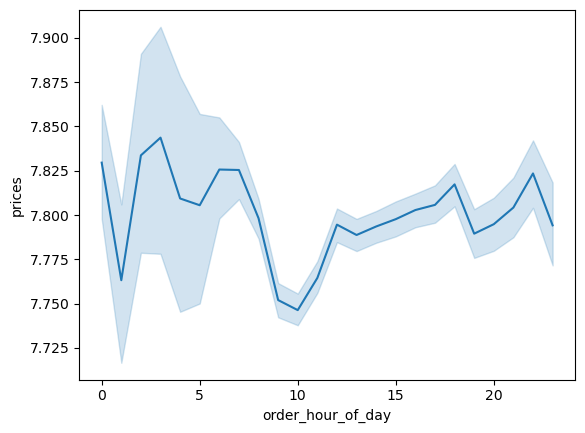

In [15]:
# Creating a line chart for order_hour_of_day and prices

line_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day', y = 'prices')

### Step 6

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [16]:
# Creating a new df that includes only necessary columns

df_age_dependants_number = small[['age','dependants_number']]

In [17]:
df_age_dependants_number.head()

,age,dependants_number
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


MemoryError: Unable to allocate 74.2 MiB for an array with shape (9721098,) and data type int64

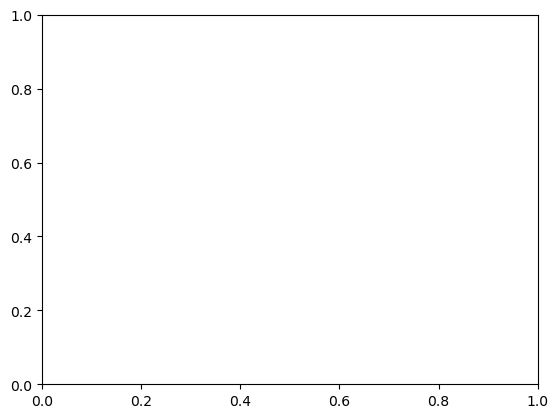

In [20]:
# Creating a line chart for age and dependants_number

line_age_dependants_number = sns.lineplot(data = df_age_dependants_number, x = 'age', y = 'dependants_number')

#### I am sorry but I have to do it in another notebook again :(

In [21]:
line_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day_prices.png'))